Importing the Modules

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading The Dataset

In [300]:
bank_data=pd.read_csv("/content/drive/MyDrive/Dataset/portu_banking_final.csv")

Checking The Head

In [301]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Checking The Tail

In [302]:
bank_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,112,4,999.0,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


Checking Info of Each Column

In [303]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

Mathematical Details of Each Features

In [304]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,963.568005,211.772296,0.000,999.000,999.000,999.000,9999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100
y,41188.0,0.112654,0.316173,0.000,0.000,0.000,0.000,1.000


Checking for Missing Value

In [305]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [306]:
bank_data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Checking Each Feature

# **Age Column**

Checking Count of Each Value

In [307]:
bank_data['age'].value_counts()

31       1530
32       1456
33       1452
35       1431
36       1408
         ... 
94          1
87          1
17          1
35-30       1
18-25       1
Name: age, Length: 159, dtype: int64

Checking unique Values

In [308]:
bank_data.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

There are some Values in Ranges we Have  convert them into a Fix Value so for that we are replacing them with their Mean

In [309]:
bank_data['age']=bank_data['age'].replace({'18-25': 22,'20-40':30,'30-32':31,'25-30':28,'30-40':35,'50-55':53,'45-50':48,'35-40':38,'20-25':23,'30-35':33,'35-30':32,'44':44,'53':53,'28':28,'39':39})

Checking Data Type Of Age Column

In [310]:
bank_data['age'].dtypes

dtype('int64')

# Job Column

*Checking Count of Each Job*

In [311]:
bank_data["job"].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
ADMIN.               2
STUDENT              2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
UNKNOWN              1
HOUSEMAID            1
Name: job, dtype: int64

Checking For Unique

In [312]:
bank_data.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

As We can see that Some of The Job's Are repeated, only written Different

In [313]:
 bank_data['job'].replace({"technician":"TECHNICIAN","blue-collar":"BLUE-COLLAR","management":"MANAGEMENT","services":"SERVICES","retired":"RETIRED","admin.":"ADMIN","housemaid":"HOUSEMAID","unknown":"ADMIN","UNKNOWN":"ADMIN","student":"STUDENT","ADMIN.":"ADMIN"},inplace=True)

In [314]:
bank_data.job.unique()

array(['BLUE-COLLAR', 'TECHNICIAN', 'MANAGEMENT', 'SERVICES', 'RETIRED',
       'ADMIN', 'HOUSEMAID', 'unemployed', 'entrepreneur',
       'self-employed', 'STUDENT'], dtype=object)

In [315]:
bank_data["job"].value_counts()

ADMIN            10752
BLUE-COLLAR       9254
TECHNICIAN        6743
SERVICES          3969
MANAGEMENT        2924
RETIRED           1720
entrepreneur      1456
self-employed     1421
HOUSEMAID         1060
unemployed        1014
STUDENT            875
Name: job, dtype: int64

# Marital Column

In [316]:
bank_data['marital'].unique()

array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [317]:
bank_data["marital"].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [318]:
bank_data['marital'].replace({"M":"married","S":"single","D":"divorced","unknown":"married"},inplace=True)

In [319]:
bank_data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [320]:
bank_data["marital"].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

# Education Column

In [321]:
bank_data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [322]:
bank_data["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [323]:
bank_data['education'].replace({'basic-6y':'basic.6y','basic-9y':'basic.9y','basic-4y':'basic.4y','unknown':'university.degree'},inplace=True)

In [324]:
bank_data["education"].value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

# default Column

In [325]:
bank_data['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [326]:
bank_data["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [327]:
bank_data['default'].replace({'unknown':'no'},inplace=True)

In [328]:
bank_data['default'].unique()

array(['no', 'yes'], dtype=object)

In [329]:
bank_data["default"].value_counts()

no     41185
yes        3
Name: default, dtype: int64

# housing Column

In [330]:
bank_data['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [331]:
bank_data["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [332]:
bank_data['housing'].replace({'unknown':'yes'},inplace=True)

In [333]:
bank_data["housing"].value_counts()

yes    22566
no     18622
Name: housing, dtype: int64

# loan Column

In [334]:
bank_data['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [335]:
bank_data["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [336]:
bank_data['loan'].replace({'unknown':'no'},inplace=True)

In [337]:
bank_data["loan"].value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

# 	contact column

In [338]:
bank_data['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [339]:
bank_data["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

# poutcome Column
outcome of the previous marketing campaign

In [340]:
bank_data['poutcome'].unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [341]:
bank_data["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

 # Section III : Exploring data with Group by

**For Y Column**

In [342]:
subscribe_data=bank_data.groupby('y').mean()
subscribe_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910802,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


**For Job Column**

In [343]:
subscribe_data=bank_data.groupby('job').mean()
subscribe_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
ADMIN,38.413411,253.862909,2.624256,955.514788,0.187965,0.026070,93.539728,-40.201004,3.562512,5164.395638,0.129185
BLUE-COLLAR,39.555327,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
HOUSEMAID,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
MANAGEMENT,42.360123,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
RETIRED,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326


**For Marital Column**

In [344]:
subscribe_data=bank_data.groupby('marital').mean()
subscribe_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899176,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.300384,257.615483,2.574776,967.871001,0.155990,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
single,33.158195,261.524378,2.533800,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


**For Education Column**

In [345]:
subscribe_data=bank_data.groupby('education').mean()
subscribe_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.447644,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.062035,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222


# Section III : Exploratory Data Analysis

In [346]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [347]:
title=[]
total=[]
yes_count=[]
no_count=[]

for i in bank_data['job'].value_counts().index:
  df_job=pd.DataFrame()
  df_job=bank_data[bank_data['job']==i]
  title.append(i)
  total.append(df_job.shape[0])
  yes_count.append(df_job[df_job['y']==1].count()['y'])
  no_count.append(df_job[df_job['y']==0].count()['y'])
df_jobs=pd.DataFrame()

df_jobs['Job Title']=title
df_jobs['Total']=total

df_jobs['Yes']=yes_count
df_jobs["No"]=no_count
df_jobs

,Job Title,Total,Yes,No
0,ADMIN,10752,1389,9363
1,BLUE-COLLAR,9254,638,8616
2,TECHNICIAN,6743,730,6013
3,SERVICES,3969,323,3646
4,MANAGEMENT,2924,328,2596
5,RETIRED,1720,434,1286
6,entrepreneur,1456,124,1332
7,self-employed,1421,149,1272
8,HOUSEMAID,1060,106,954
9,unemployed,1014,144,870


In [348]:
group= bank_data.groupby(['marital','y'])['y'].count
print(group)

<bound method SeriesGroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f54e3df6a90>>


In [349]:
#for cat in 

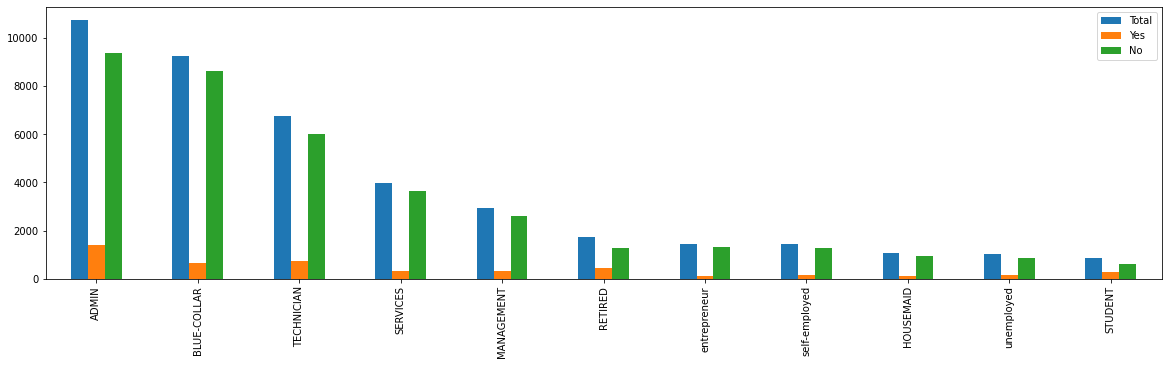

In [350]:
labels=df_jobs['Job Title']
positions=np.arange(0,11,1)
df_jobs.plot(kind='bar',figsize=(20,5))
plt.xticks(positions,labels)
plt.show()

In [351]:
df_jobs_final=pd.DataFrame()
df_jobs_final['Job Title']=title
df_jobs_final['Percentage_yes']=(df_jobs['Yes']/df_jobs['Total'])*100
df_jobs_final['Percentage_no']=(df_jobs['No']/df_jobs['Total'])*100
df_jobs_final=df_jobs_final.sort_values('Percentage_yes',ascending=False)
df_jobs_final

,Job Title,Percentage_yes,Percentage_no
10,STUDENT,31.428571,68.571429
5,RETIRED,25.232558,74.767442
9,unemployed,14.201183,85.798817
0,ADMIN,12.918527,87.081473
4,MANAGEMENT,11.217510,88.782490
2,TECHNICIAN,10.826042,89.173958
7,self-employed,10.485574,89.514426
8,HOUSEMAID,10.000000,90.000000
6,entrepreneur,8.516484,91.483516
3,SERVICES,8.138070,91.861930


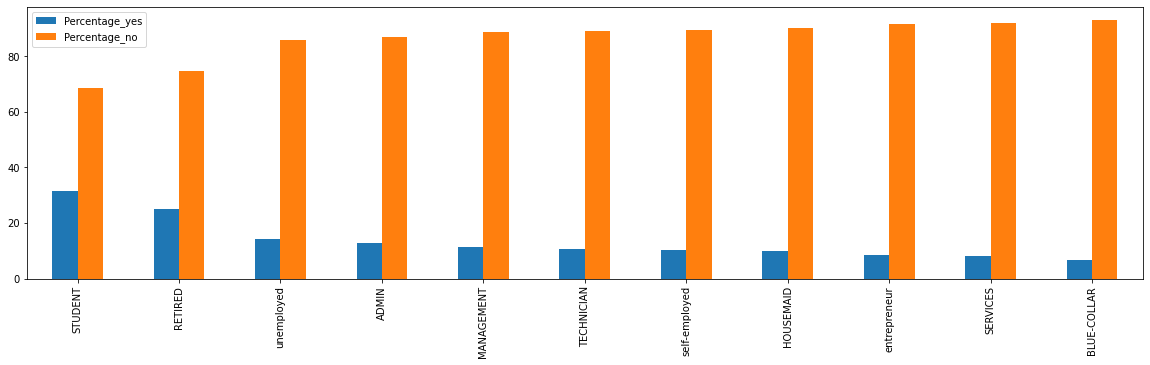

In [352]:
labels=df_jobs_final['Job Title'].tolist()
position=df_jobs_final['Job Title'].index
df_jobs_final.plot(kind='bar',figsize=(20,5))
plt.xticks(positions, labels)
plt.show()

1) From Above graph it is clear that students and Retired people are the clients who have high percentage of of subscription rate.
2) People with job description as 'Blue-collar' are the most contacted people
3)Students are the less contacted people

**Marital State**

In [353]:
df_married=bank_data[bank_data['marital']=='married']
df_single=bank_data[bank_data['marital']=='single']
df_divorced=bank_data[bank_data['marital']=='divorced']
married=bank_data['marital'].value_counts().to_frame()
married

,marital
married,25008
single,11568
divorced,4612


In [354]:
yes_count=[]
yes_count.append(df_married[df_married['y']==1].count()[1])
yes_count.append(df_single[df_single['y']==1].count()[1])
yes_count.append(df_divorced[df_divorced['y']==1].count()[1])
married['Subscription count']=yes_count

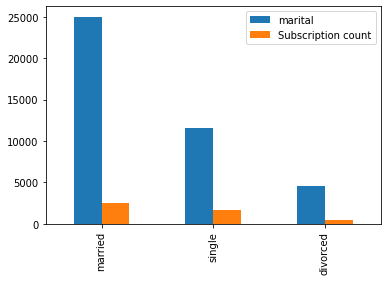

In [355]:
married.plot(kind='bar')

In [356]:
married['Percentage']=(married['Subscription count']/married['marital'])*100
married.sort_values(by='Percentage',ascending=False)

,marital,Subscription count,Percentage
single,11568,1620,14.004149
divorced,4612,476,10.320902
married,25008,2544,10.172745


As per the visualization, 'Marital' and y don't have a strong relationship

In [357]:
education=bank_data['education'].value_counts().to_frame()
education

,education
university.degree,13899
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
illiterate,18


In [358]:
df_university=bank_data[bank_data['education']=='university.degree']
df_high=bank_data[bank_data['education']=='high.school']
df_basic9=bank_data[bank_data['education']=='basic.9y']
df_prof=bank_data[bank_data['education']=='professional.course']
df_basic4=bank_data[bank_data['education']=='basic.4y']
df_basic6=bank_data[bank_data['education']=='basic.6y']
df_illiterate=bank_data[bank_data['education']=='illiterate']


In [359]:
yes_count=[]
yes_count.append(df_university[df_university['y']==1].count()[1])
yes_count.append(df_high[df_high['y']==1].count()[1])
yes_count.append(df_basic9[df_basic9['y']==1].count()[1])
yes_count.append(df_prof[df_prof['y']==1].count()[1])
yes_count.append(df_basic4[df_basic4['y']==1].count()[1])

yes_count.append(df_basic6[df_basic6['y']==1].count()[1])
yes_count.append(df_illiterate[df_illiterate['y']==1].count()[1])

education['Subscription count']=yes_count

In [360]:
education['Subscription count']

university.degree      1921
high.school            1031
basic.9y                473
professional.course     595
basic.4y                428
basic.6y                188
illiterate                4
Name: Subscription count, dtype: int64

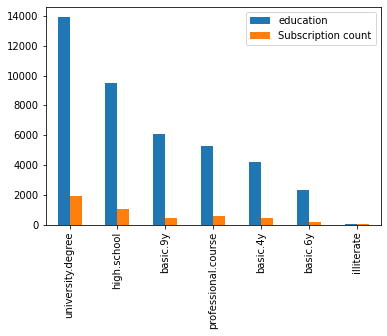

In [361]:
education.plot(kind='bar')

In [362]:
education['Percentage']=(education['Subscription count']/education['education'])*100
education.sort_values(by='Percentage',ascending=False)

,education,Subscription count,Percentage
illiterate,18,4,22.222222
university.degree,13899,1921,13.821138
professional.course,5243,595,11.348465
high.school,9515,1031,10.835523
basic.4y,4176,428,10.249042
basic.6y,2292,188,8.202443
basic.9y,6045,473,7.824648


1)Columns 'education' and 'y' don't show strong relstionship

# Stack GRaph

For Job Column

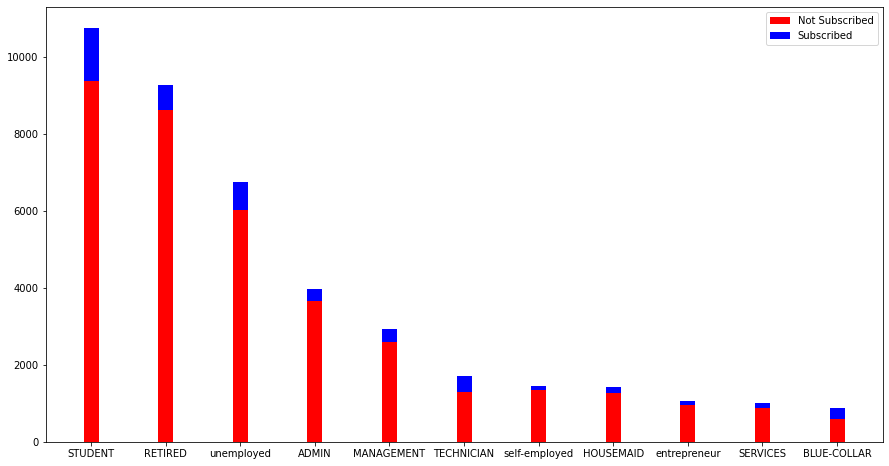

In [363]:
plt.figure(figsize=(15,8))
plt.bar(labels,df_jobs['No'],color='r',width=0.2)
plt.bar(labels,df_jobs['Yes'],bottom=df_jobs['No'],color='b',width=0.2)
plt.legend(["Not Subscribed","Subscribed"])
plt.show()

Creating Dummy

In [364]:
data_new=pd.get_dummies(bank_data,columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'])

In [365]:
data_new.dtypes

age                                int64
duration                           int64
campaign                           int64
pdays                            float64
previous                           int64
emp_var_rate                     float64
cons_price_idx                   float64
cons_conf_idx                    float64
euribor3m                        float64
nr_employed                      float64
y                                  int64
job_ADMIN                          uint8
job_BLUE-COLLAR                    uint8
job_HOUSEMAID                      uint8
job_MANAGEMENT                     uint8
job_RETIRED                        uint8
job_SERVICES                       uint8
job_STUDENT                        uint8
job_TECHNICIAN                     uint8
job_entrepreneur                   uint8
job_self-employed                  uint8
job_unemployed                     uint8
marital_divorced                   uint8
marital_married                    uint8
marital_single  

In [366]:
data_new.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_ADMIN,job_BLUE-COLLAR,job_HOUSEMAID,job_MANAGEMENT,job_RETIRED,job_SERVICES,job_STUDENT,job_TECHNICIAN,job_entrepreneur,job_self-employed,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


Logistic Regression

In [367]:
data_new.columns[1]

'duration'

In [368]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_ADMIN                      41188 non-null  uint8  
 12  job_BLUE-COLLAR                41188 non-null 

In [369]:
X=data_new.drop(['y'],axis=1)
y=data_new['y']

In [370]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [371]:
from sklearn.metrics import classification_report
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
LR=model.score(X_test,y_test)
print("Accuracy",LR)
print(classification_report(y_test,y_predict))

Accuracy 0.9097677429796877
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10924
           1       0.67      0.43      0.53      1433

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [372]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[10623   301]
 [  814   619]]


SMOTE

In [373]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_sample(X,y)
print(y.shape)
print(y_smote.shape)

(41188,)
(73096,)


In [374]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.3,random_state=2)

In [375]:
from sklearn.metrics import classification_report
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
Accuracy=model.score(X_test,y_test)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:",Accuracy)
print(classification_report(y_test,y_predict))

Accuracy: 0.8532080806238315
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     11059
           1       0.85      0.86      0.85     10870

    accuracy                           0.85     21929
   macro avg       0.85      0.85      0.85     21929
weighted avg       0.85      0.85      0.85     21929



In [376]:
results=pd.DataFrame([['Logistic Regression ', accuracy, prec, rec, f1]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [377]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[9390 1669]
 [1550 9320]]


# Section VIII : Training time !

In [378]:
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=6)
fit=rfe.fit(X,y)

In [379]:
print("Num Features:",fit.n_features_)
print("Selected Features:",fit.support_)


Num Features: 6
Selected Features: [False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False  True  True False False
 False False False False False False  True False  True]


In [380]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False  True  True False False
 False False False False False False  True False  True]
[48 40 24 49  8 26 30 28  1 36 25  6 47 43  3 12  2 32 17 50 38 42 33 22
 21 31 18 29 51 35 16 41 52 45 44 37 39 23  9  1  7 10 15 27  1  1  4 11
 46 34  5 20 19 14  1 13  1]


In [381]:
for i in range(0,52):
  if rfe.support_[i]==True:
    print("Featured Columns :",data_new.columns[i])
  else:
    pass

Featured Columns : euribor3m
Featured Columns : contact_telephone
Featured Columns : month_jun
Featured Columns : month_mar


In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
model=LogisticRegression(random_state=9)
model.fit(X_train,y_train)
#predicting 
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', accuracy, prec, rec, f1]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results=results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.852205,0.844860,0.859706,0.852218
1,Logistic Regression RFE (Lasso),0.853208,0.848121,0.857406,0.852738
